In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pdb
pd.set_option('max_rows', 1500)
pd.options.display.max_rows = 999 
pd.options.display.max_rows
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

height has been deprecated.



In [2]:
df = pd.read_csv('ex2data1.txt', names=['Exam 1 score', 'Exam 2 score', 'Admitted?'])
admitted = df[df['Admitted?'].isin([1])]
notAdmitted = df[df['Admitted?'].isin([0])]

X_data = df['Exam 1 score']
y_data = df['Exam 2 score']
admit = df['Admitted?']

df

,Exam 1 score,Exam 2 score,Admitted?
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


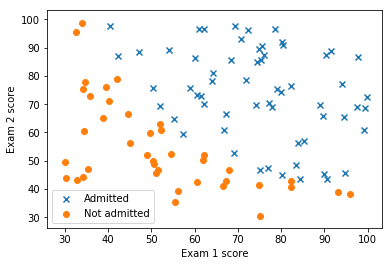

In [3]:
plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], marker='x', label="Admitted")
plt.scatter(notAdmitted['Exam 1 score'], notAdmitted['Exam 2 score'], marker='o', label="Not admitted")
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [4]:
def sigmoid(x):
    return 1.0/(1+ math.exp(-x))

print(sigmoid(4)) # larger x -> 1
print(sigmoid(-9)) # smaller x -> 0
print(sigmoid(0)) # x = 0 -> 0.5

0.9820137900379085
0.00012339457598623172
0.5


In [16]:
X_matrix = df.as_matrix(df.columns[:-1])
X_matrix = np.insert(X_matrix, 0, 1, axis=1) 
# remember to insert column of 1's for X_0 intercept

X_matrix = np.matrix(X_matrix)
y = np.matrix(df[df.columns[-1:]]) # admitted or not
theta = np.zeros(X_matrix.shape[1]) # initialize theta to be 0

In [17]:
# now need to be able to do this for a matrix

def sigmoidMatrix(matrix):
    for x in np.nditer(matrix, op_flags=['readwrite']):
        x[...]=sigmoid(x)
    return matrix

# compute cost

def computeCost(theta, X, y):
    theta = np.matrix(theta.T)
    m = len(y)
    h = sigmoidMatrix(X*theta.T) # vectorization
    cost = (-y.T * np.log(h) - (1-y).T * np.log(1-h))/m
    return cost

def gradient(theta, X, y):
    theta = np.matrix(theta)
    m = len(y)
    error = sigmoidMatrix(X*theta.T) - y 
    gradient = (X.T * error) / m

    return gradient

gradient(theta,X_matrix,y)
from scipy.optimize import fmin_tnc
minimum = fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_matrix, y))
computeCost(minimum[0],X_matrix,y)

matrix([[ 0.2034977]])

array([ 0.,  0.,  0.])